In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]

Saving Healthcare Documentation Database.csv to Healthcare Documentation Database.csv


In [ ]:
import  pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
db = sqlite3.connect('healthcare.db')
df = pd.read_csv(file_name)
df.to_sql('Healthcare_Data', db, if_exists='replace', index=False)

3813

In [ ]:
q = '''
SELECT *
FROM Healthcare_Data
'''
pd.read_sql_query(q, db)

,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective 23yearold white female present co...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history difficulty climbing sta...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today plea...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement left atri...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 left ventricular cavity size wall thickness ...
...,...,...,...,...,...,...,...
3808,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"admission diagnosis:, morbid obesity. bmi is...","bariatrics, laparoscopic gastric bypass, gastr...",admission diagnosis morbid obesity bmi 51 ...
3809,4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"history of present illness:, ms. a is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem...",history present illness ms 55yearold female ...
3810,4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"past medical history: ,she had a negative str...","bariatrics, elective surgical weight loss, sur...",past medical history negative stress test fo...
3811,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"history:, a 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros...",history 55yearold female present selfreferre...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Serial No              3813 non-null   int64 
 1   description            3813 non-null   object
 2   medical_specialty      3813 non-null   object
 3   sample_name            3813 non-null   object
 4   transcription          3813 non-null   object
 5   keywords               3813 non-null   object
 6   cleaned_transcription  3813 non-null   object
dtypes: int64(1), object(6)
memory usage: 208.6+ KB


# These are the sections to be looked into
 1.  Descriptive Statistics

*   Frequency Count of Medical Specialties:
* Count of Transcriptions per Sample Name:

2. Keyword Analysis

*   Most Frequent Keywords:
*   Keywords by Specialty:

3. Medical Specialty Trends

*  Most Common Procedures per Specialty

4. Text-Based Insights


*   Keyword Frequency in Transcriptions:
*  Transcriptions Containing Specific Medical Terms:

5. Analyzing Missing or Inconsistent Data

*   Identify Missing Transcriptions:
* Check for Inconsistent Data:

6. Correlation and Relationship Insights

*   Relationships Between Specialties and Procedures

7. Yearly or Periodic Trends (if Time Data Exists)

*   Trends over Time (if a timestamp is present):

8. Classification of Complex Procedures


*   Complexity of Procedures by Specialty

9. Top Medical Conditions and Procedures

* Top 5 Medical Procedures or Diagnoses













In [ ]:
#Descriptive statistics
#Frequency Count of Medical Specialties
q = '''
SELECT medical_specialty, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY medical_specialty
ORDER BY frequency DESC
'''
pd.read_sql_query(q, db)



,medical_specialty,frequency
0,Surgery,1007
1,Orthopedic,296
2,Cardiovascular / Pulmonary,276
3,Radiology,248
4,Consult - History and Phy.,219
5,Gastroenterology,192
6,Neurology,162
7,SOAP / Chart / Progress Notes,140
8,Urology,139
9,General Medicine,137


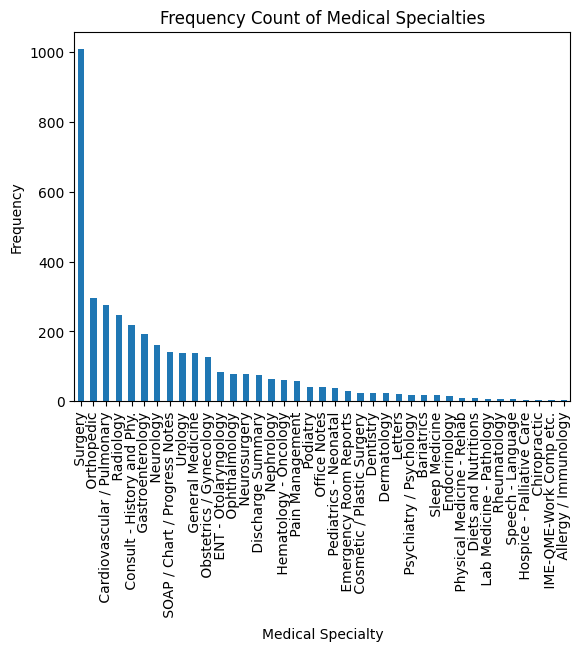

In [ ]:
#let us have a visualization
df['medical_specialty'].value_counts().plot(kind='bar')
plt.xlabel('Medical Specialty')
plt.ylabel('Frequency')
plt.title('Frequency Count of Medical Specialties')
plt.show()

In [ ]:
#Count of Transcriptions per Sample Name
q = '''
SELECT sample_name, COUNT(*) AS transcription_count
FROM Healthcare_Data
GROUP BY sample_name
ORDER BY transcription_count DESC
'''
pd.read_sql_query(q, db)

,sample_name,transcription_count
0,Lumbar Discogram,5
1,Ulnar Nerve Transposition,4
2,Toothache - ER Visit,4
3,Symes Amputation - Hallux,4
4,Radiofrequency Ablation,4
...,...,...
1820,Angina,1
1821,Altered Mental Status - ER Visit,1
1822,Acromioclavicular Joint Injection,1
1823,Achilles Ruptured Tendon,1


#Key word Analysis



*   Most Frequent Keywords:
*   Keywords by Specialty:



In [ ]:
#Keyword Analysis
#Most frequent key word
q = '''
SELECT keywords, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY keywords
ORDER BY frequency DESC
'''
pd.read_sql_query(q, db)




,keywords,frequency
0,surgery,2
1,gastroenterology,2
2,"urology, vasovasostomy, adventitial tissue, an...",1
3,"urology, vasectomy, allis clamp, catgut, hemoc...",1
4,"urology, vas, contralateral, desire for steril...",1
...,...,...
3806,"bariatrics, elective surgical weight loss, sur...",1
3807,"bariatrics, breast reconstruction, excess, lma...",1
3808,"allergy / immunology, mucous membranes, conjun...",1
3809,"allergy / immunology, chronic glossitis, xeros...",1


In [ ]:
#Keywords by speciality
q = '''
SELECT medical_specialty, keywords, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY medical_specialty, keywords
ORDER BY medical_specialty, frequency DESC
'''
pd.read_sql_query(q, db)

,medical_specialty,keywords,frequency
0,Allergy / Immunology,"allergy / immunology, mucous membranes, conjun...",1
1,Allergy / Immunology,"allergy / immunology, chronic glossitis, xeros...",1
2,Allergy / Immunology,"allergy / immunology, allergic rhinitis, aller...",1
3,Bariatrics,"bariatrics, weight watchers, roux en y, atkins...",1
4,Bariatrics,"bariatrics, morbid obesity, roux-en-y, gastric...",1
...,...,...,...
3806,Urology,"urology, benign prostatic hyperplasia, urethra...",1
3807,Urology,"urology, benign prostatic hyperplasia, cystosc...",1
3808,Urology,"urology, ballooning of the foreskin, spraying ...",1
3809,Urology,"urology, adrenalectomy, laparoscopic hand-assi...",1


#Medical Specialty Trends
  **Most Common Procedures per Specialty**

  #his column does not exists

##Text-Based Insights
  **Keyword Frequency in Transcriptions**

  **Transcriptions Containing Specific Medical Terms**

In [ ]:
#Keyword frequency in transcriptions
q = '''
SELECT keywords, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY keywords
ORDER BY frequency DESC
'''
pd.read_sql_query(q, db)


,keywords,frequency
0,surgery,2
1,gastroenterology,2
2,"urology, vasovasostomy, adventitial tissue, an...",1
3,"urology, vasectomy, allis clamp, catgut, hemoc...",1
4,"urology, vas, contralateral, desire for steril...",1
...,...,...
3806,"bariatrics, elective surgical weight loss, sur...",1
3807,"bariatrics, breast reconstruction, excess, lma...",1
3808,"allergy / immunology, mucous membranes, conjun...",1
3809,"allergy / immunology, chronic glossitis, xeros...",1


In [ ]:
#Transcriptions Containing Specific Medical Terms
q = '''
SELECT *
FROM Healthcare_Data
WHERE transcription LIKE '%laparoscopic gastric bypass%'
'''
pd.read_sql_query(q, db)


,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today plea...
1,3942,Patient suffered from morbid obesity for many...,Discharge Summary,Discharge Summary - Gastric Bypass,"admission diagnosis:, morbid obesity. bmi is...","discharge summary, laparoscopic gastric bypass...",admission diagnosis morbid obesity bmi 51 ...
2,4305,Consult for laparoscopic gastric bypass.,Consult - History and Phy.,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","consult - history and phy., laparoscopic gastr...",history present illness seen abc today plea...
3,4414,Patient scheduled for laparoscopic gastric by...,Consult - History and Phy.,Gastric Bypass Discussion - 2,"history: , the patient is scheduled for laparo...","consult - history and phy., medifast, laparosc...",history patient scheduled laparoscopic gastr...
4,4417,"Gentleman with long-standing morbid obesity, ...",Consult - History and Phy.,Gastric Bypass Discussion - 1,"history of present illness: , in short, the pa...","consult - history and phy., medifast, medifast...",history present illness short patient 55yea...
5,4977,"Gentleman with long-standing morbid obesity, ...",Bariatrics,Gastric Bypass Discussion - 1,"history of present illness: , in short, the pa...","bariatrics, medifast, medifast dieting, hypert...",history present illness short patient 55yea...
6,4979,Patient scheduled for laparoscopic gastric by...,Bariatrics,Gastric Bypass Discussion - 2,"history: , the patient is scheduled for laparo...","bariatrics, medifast, laparoscopic gastric byp...",history patient scheduled laparoscopic gastr...
7,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"admission diagnosis:, morbid obesity. bmi is...","bariatrics, laparoscopic gastric bypass, gastr...",admission diagnosis morbid obesity bmi 51 ...


##Analyzing Missing or Inconsistent Data
 **Identify Missing Transcriptions**

 **Check for Inconsistent Data**

In [ ]:
#Identify Missing Transcriptions
q = '''
SELECT *
FROM Healthcare_Data
WHERE transcription IS NULL
'''
pd.read_sql_query(q, db)


,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription


In [ ]:
#Identify Missing sample_name
q = '''
SELECT *
FROM Healthcare_Data
WHERE sample_name IS NULL
'''
pd.read_sql_query(q, db)

,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription


In [ ]:
#Identify Missing cleaned transcription
q = '''
SELECT *
FROM Healthcare_Data
WHERE cleaned_transcription IS NULL
'''
pd.read_sql_query(q, db)

,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription


All these columns has no null entries

In [ ]:
#Check for Inconsistent Data
q = '''
SELECT *
FROM Healthcare_Data
WHERE transcription <> cleaned_transcription
'''
pd.read_sql_query(q, db)

,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective 23yearold white female present co...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history difficulty climbing sta...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today plea...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement left atri...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 left ventricular cavity size wall thickness ...
...,...,...,...,...,...,...,...
3808,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"admission diagnosis:, morbid obesity. bmi is...","bariatrics, laparoscopic gastric bypass, gastr...",admission diagnosis morbid obesity bmi 51 ...
3809,4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"history of present illness:, ms. a is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem...",history present illness ms 55yearold female ...
3810,4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"past medical history: ,she had a negative str...","bariatrics, elective surgical weight loss, sur...",past medical history negative stress test fo...
3811,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"history:, a 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros...",history 55yearold female present selfreferre...


# Correlation and Relationship Insights

**Relationships Between Specialties and Procedures**

In [ ]:
#Relationships between specialities and transcription
q = '''
SELECT medical_specialty, keywords, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY medical_specialty, keywords
ORDER BY medical_specialty, frequency DESC
'''
pd.read_sql_query(q, db)


,medical_specialty,keywords,frequency
0,Allergy / Immunology,"allergy / immunology, mucous membranes, conjun...",1
1,Allergy / Immunology,"allergy / immunology, chronic glossitis, xeros...",1
2,Allergy / Immunology,"allergy / immunology, allergic rhinitis, aller...",1
3,Bariatrics,"bariatrics, weight watchers, roux en y, atkins...",1
4,Bariatrics,"bariatrics, morbid obesity, roux-en-y, gastric...",1
...,...,...,...
3806,Urology,"urology, benign prostatic hyperplasia, urethra...",1
3807,Urology,"urology, benign prostatic hyperplasia, cystosc...",1
3808,Urology,"urology, ballooning of the foreskin, spraying ...",1
3809,Urology,"urology, adrenalectomy, laparoscopic hand-assi...",1


from matplotlib import pyplot as plt
_df_0['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

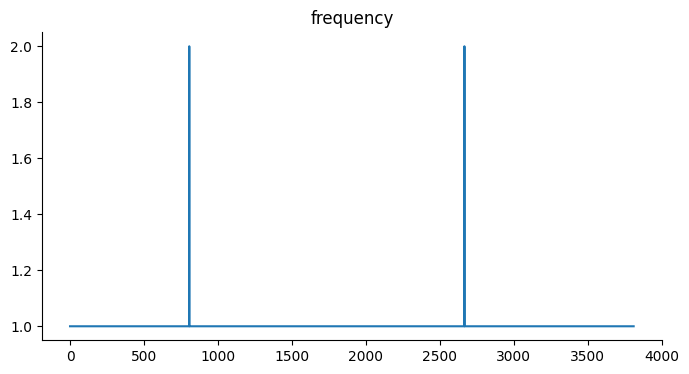

In [ ]:
from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

## Top Medical Conditions and Procedures
 **Top 5 Medical Procedures or Diagnoses**

In [ ]:
#Top 5 Medical Procedures or Diagnoses
q = '''
SELECT medical_specialty, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY medical_specialty
ORDER BY frequency DESC
'''
pd.read_sql_query(q, db)


,medical_specialty,frequency
0,Surgery,1007
1,Orthopedic,296
2,Cardiovascular / Pulmonary,276
3,Radiology,248
4,Consult - History and Phy.,219
5,Gastroenterology,192
6,Neurology,162
7,SOAP / Chart / Progress Notes,140
8,Urology,139
9,General Medicine,137


from matplotlib import pyplot as plt
_df_2['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

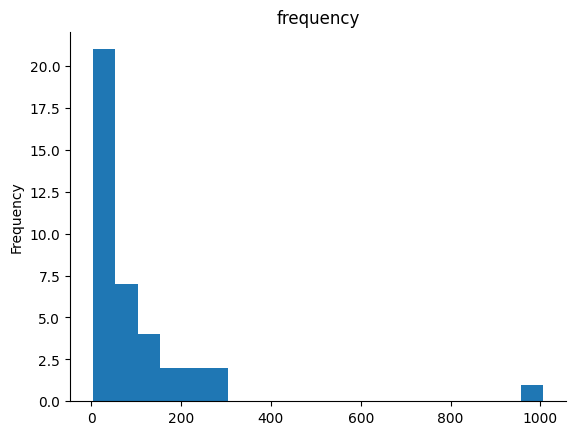

In [ ]:
from matplotlib import pyplot as plt
_df_2['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Classification of Complex Procedures

 **Complexity of Procedures by Specialty**

In [ ]:
#Complexity of Procedures by Specialty
q = '''
SELECT medical_specialty, COUNT(*) AS frequency
FROM Healthcare_Data
GROUP BY medical_specialty
ORDER BY frequency DESC
'''
pd.read_sql_query(q, db)

,medical_specialty,frequency
0,Surgery,1007
1,Orthopedic,296
2,Cardiovascular / Pulmonary,276
3,Radiology,248
4,Consult - History and Phy.,219
5,Gastroenterology,192
6,Neurology,162
7,SOAP / Chart / Progress Notes,140
8,Urology,139
9,General Medicine,137
